<a href="https://colab.research.google.com/github/arthur-siqueira/data-mining-project/blob/main/sprint03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Mineração de Dados - Projeto 02

# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Carregar os arquivos CSV
fact_stocks = pd.read_csv("factStocks.csv")
dim_company = pd.read_csv("dimCompany.csv")
dim_time = pd.read_csv("dimTime.csv")

df = fact_stocks.merge(dim_company, on="keyCompany", how="left")
df = df.merge(dim_time[['keyTime', 'datetime']], on="keyTime", how="left")
df["datetime"] = pd.to_datetime(df["datetime"])

In [29]:
print("📄 factStocks.csv:")
print(fact_stocks.head(), '\n')

print("🏢 dimCompany.csv:")
print(dim_company.head(), '\n')

print("🕒 dimTime.csv:")
print(dim_time.head(), '\n')

📄 factStocks.csv:
   keyTime  keyCompany  openValueStock  closeValueStock  highValueStock  \
0     1355          18           45.80             45.8            45.8   
1     1355         107           12.15             12.6            12.6   
2     1355         108           17.00             17.5            17.5   
3     1355         604          299.00            299.0           299.0   
4     1355         110           53.10             52.0            53.8   

   lowValueStock  quantityStock  
0          45.80          916.0  
1          12.15       668420.0  
2          16.95      3789172.0  
3         299.00        59800.0  
4          52.00      8331641.0   

🏢 dimCompany.csv:
   keyCompany stockCodeCompany   nameCompany sectorCodeCompany  \
0           1            BRAP4     BRADESPAR              IMAT   
1           2            PMAM3  PARANAPANEMA              IMAT   
2           3            CSNA3  SID NACIONAL              IMAT   
3           4            SUZB3   SUZANO S.A

In [30]:
# Mostrar tamanho de cada dataset
print("🔍 Tamanho dos arquivos:")
print(f"factStocks: {fact_stocks.shape[0]} linhas × {fact_stocks.shape[1]} colunas")
print(f"dimCompany: {dim_company.shape[0]} linhas × {dim_company.shape[1]} colunas")
print(f"dimTime: {dim_time.shape[0]} linhas × {dim_time.shape[1]} colunas\n")

🔍 Tamanho dos arquivos:
factStocks: 680150 linhas × 7 colunas
dimCompany: 607 linhas × 6 colunas
dimTime: 9680 linhas × 13 colunas



In [31]:
# Listar todas as variáveis (nomes das colunas)
print("Variáveis em factStocks:", fact_stocks.columns.tolist())
print("Variáveis em dimCompany:", dim_company.columns.tolist())
print("Variáveis em dimTime:", dim_time.columns.tolist(), '\n')

Variáveis em factStocks: ['keyTime', 'keyCompany', 'openValueStock', 'closeValueStock', 'highValueStock', 'lowValueStock', 'quantityStock']
Variáveis em dimCompany: ['keyCompany', 'stockCodeCompany', 'nameCompany', 'sectorCodeCompany', 'sectorCompany', 'segmentCompany']
Variáveis em dimTime: ['keyTime', 'datetime', 'dayTime', 'dayWeekTime', 'dayWeekAbbrevTime', 'dayWeekCompleteTime', 'monthTime', 'monthAbbrevTime', 'monthCompleteTime', 'bimonthTime', 'quarterTime', 'semesterTime', 'yearTime'] 



In [32]:
# Classificar variáveis quantitativas e qualitativas
def classificar_variaveis(df):
    quantitativas = df.select_dtypes(include=[np.number]).columns.tolist()
    qualitativas = df.select_dtypes(exclude=[np.number]).columns.tolist()
    return quantitativas, qualitativas

q_fact, qual_fact = classificar_variaveis(fact_stocks)
q_comp, qual_comp = classificar_variaveis(dim_company)
q_time, qual_time = classificar_variaveis(dim_time)

In [33]:
# Construir a tabela de resumo de variáveis por tipo

resumo = []

# Adiciona as variáveis de factStocks
for var in q_fact:
    resumo.append(["factStocks", var, "Quantitativa"])
for var in qual_fact:
    resumo.append(["factStocks", var, "Qualitativa"])

# Adiciona as variáveis de dimCompany
for var in q_comp:
    resumo.append(["dimCompany", var, "Quantitativa"])
for var in qual_comp:
    resumo.append(["dimCompany", var, "Qualitativa"])

# Adiciona as variáveis de dimTime
for var in q_time:
    resumo.append(["dimTime", var, "Quantitativa"])
for var in qual_time:
    resumo.append(["dimTime", var, "Qualitativa"])

# Cria o DataFrame
resumo_variaveis = pd.DataFrame(resumo, columns=["Dataset", "Variável", "Tipo"])

# Exibe a tabela
print("📊 Tabela resumo de variáveis por tipo:")
print(resumo_variaveis)

📊 Tabela resumo de variáveis por tipo:
       Dataset             Variável          Tipo
0   factStocks              keyTime  Quantitativa
1   factStocks           keyCompany  Quantitativa
2   factStocks       openValueStock  Quantitativa
3   factStocks      closeValueStock  Quantitativa
4   factStocks       highValueStock  Quantitativa
5   factStocks        lowValueStock  Quantitativa
6   factStocks        quantityStock  Quantitativa
7   dimCompany           keyCompany  Quantitativa
8   dimCompany     stockCodeCompany   Qualitativa
9   dimCompany          nameCompany   Qualitativa
10  dimCompany    sectorCodeCompany   Qualitativa
11  dimCompany        sectorCompany   Qualitativa
12  dimCompany       segmentCompany   Qualitativa
13     dimTime              keyTime  Quantitativa
14     dimTime              dayTime  Quantitativa
15     dimTime          dayWeekTime  Quantitativa
16     dimTime            monthTime  Quantitativa
17     dimTime          bimonthTime  Quantitativa
18     dimT

In [34]:
# Função para gerar estatísticas descritivas das ações por empresa
colunas_valores = ['openValueStock', 'closeValueStock', 'highValueStock', 'lowValueStock']

def estatisticas_empresa(nome_empresa):
    dados = df[df['nameCompany'] == nome_empresa][colunas_valores]
    estat = dados.describe().T
    estat['Mediana'] = dados.median()
    estat['Moda'] = dados.mode().iloc[0]
    estat = estat[['mean', 'Mediana', 'Moda', 'std', 'min', '25%', '50%', '75%', 'max']]
    estat.columns = ['Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Mínimo',
                     '1º Quartil', '2º Quartil', '3º Quartil', 'Máximo']
    return estat.round(2)

## Análise Estatística de Empresas Específicas

Nesta seção, serão analisadas as ações de três grandes empresas brasileiras: **PETROBRAS**, **BANCO DO BRASIL** e **VALE**, com base nos valores de abertura, fechamento, máxima e mínima.


In [35]:
estat_petrobras = estatisticas_empresa("PETROBRAS")
estat_petrobras


,Média,Mediana,Moda,Desvio Padrão,Mínimo,1º Quartil,2º Quartil,3º Quartil,Máximo
openValueStock,58.99,33.46,50.0,77.20,4.20,19.97,33.46,56.89,514.0
closeValueStock,58.99,33.34,49.0,77.27,4.20,19.95,33.34,56.80,515.0
highValueStock,59.94,34.00,54.5,78.49,4.27,20.27,34.00,57.60,521.0
lowValueStock,57.99,32.78,55.0,75.86,4.12,19.66,32.78,56.00,509.0


In [36]:
estat_bb = estatisticas_empresa("BRASIL")
estat_bb


,Média,Mediana,Moda,Desvio Padrão,Mínimo,1º Quartil,2º Quartil,3º Quartil,Máximo
openValueStock,25.62,25.01,6.0,14.08,5.25,14.40,25.01,31.07,83.64
closeValueStock,25.61,25.03,30.0,14.08,5.10,14.35,25.03,31.07,83.15
highValueStock,26.04,25.45,6.0,14.27,5.40,14.70,25.45,31.55,85.70
lowValueStock,25.17,24.59,6.2,13.87,5.10,14.19,24.59,30.58,81.50


In [37]:
estat_vale = estatisticas_empresa("VALE")
estat_vale


,Média,Mediana,Moda,Desvio Padrão,Mínimo,1º Quartil,2º Quartil,3º Quartil,Máximo
openValueStock,51.92,47.21,49.0,29.77,8.75,32.35,47.21,60.00,181.8
closeValueStock,51.94,47.11,52.0,29.82,8.60,32.45,47.11,60.10,180.0
highValueStock,52.67,47.80,49.0,30.26,9.06,32.96,47.80,61.10,185.0
lowValueStock,51.20,46.58,51.5,29.41,8.60,31.94,46.58,59.13,175.0


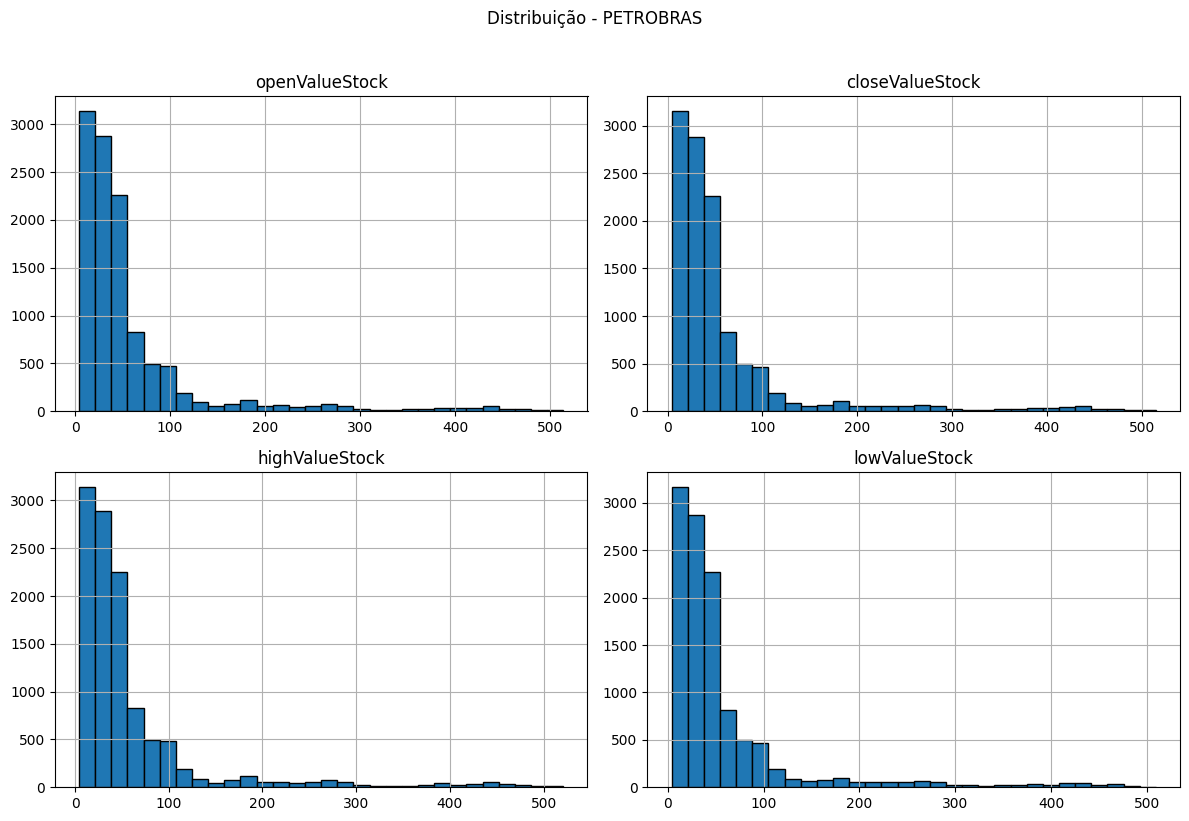

In [38]:
df[df['nameCompany'] == "PETROBRAS"][colunas_valores].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribuição - PETROBRAS", y=1.02)
plt.tight_layout()
plt.show()

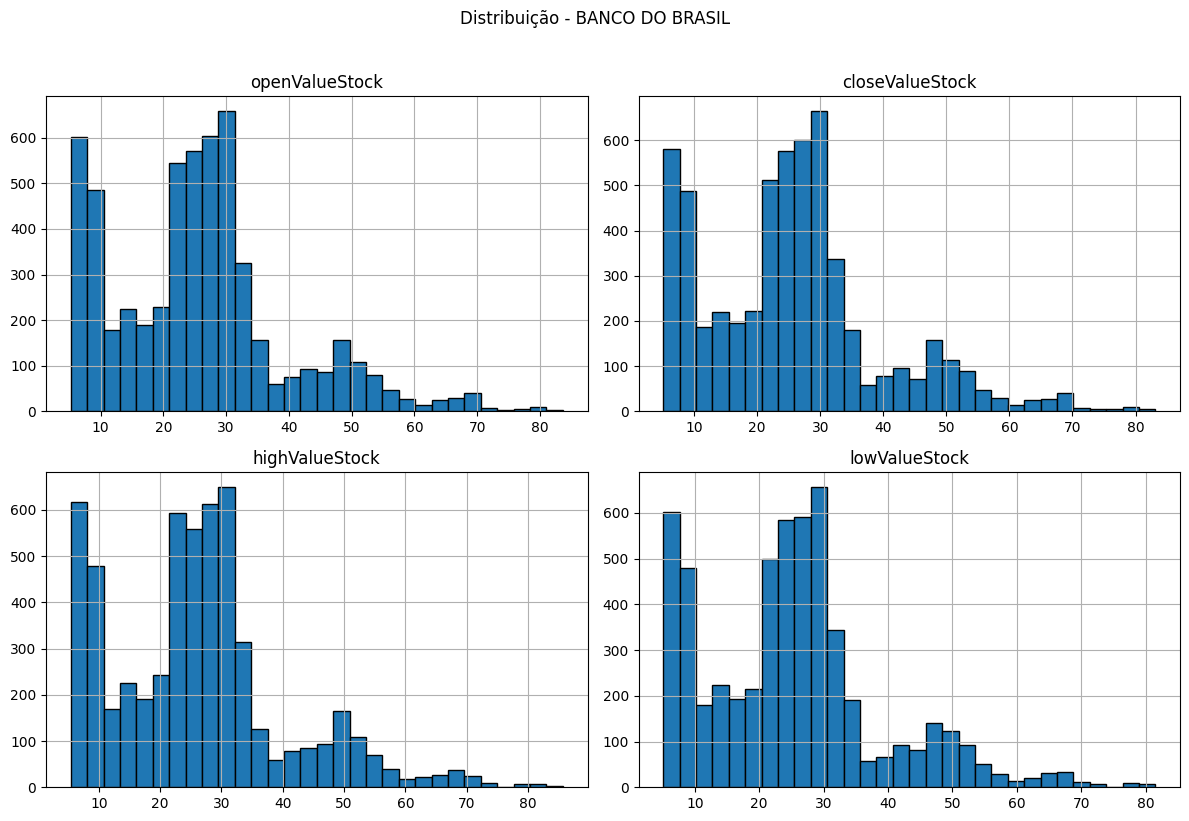

In [39]:
df[df['nameCompany'] == "BRASIL"][colunas_valores].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribuição - BANCO DO BRASIL", y=1.02)
plt.tight_layout()
plt.show()

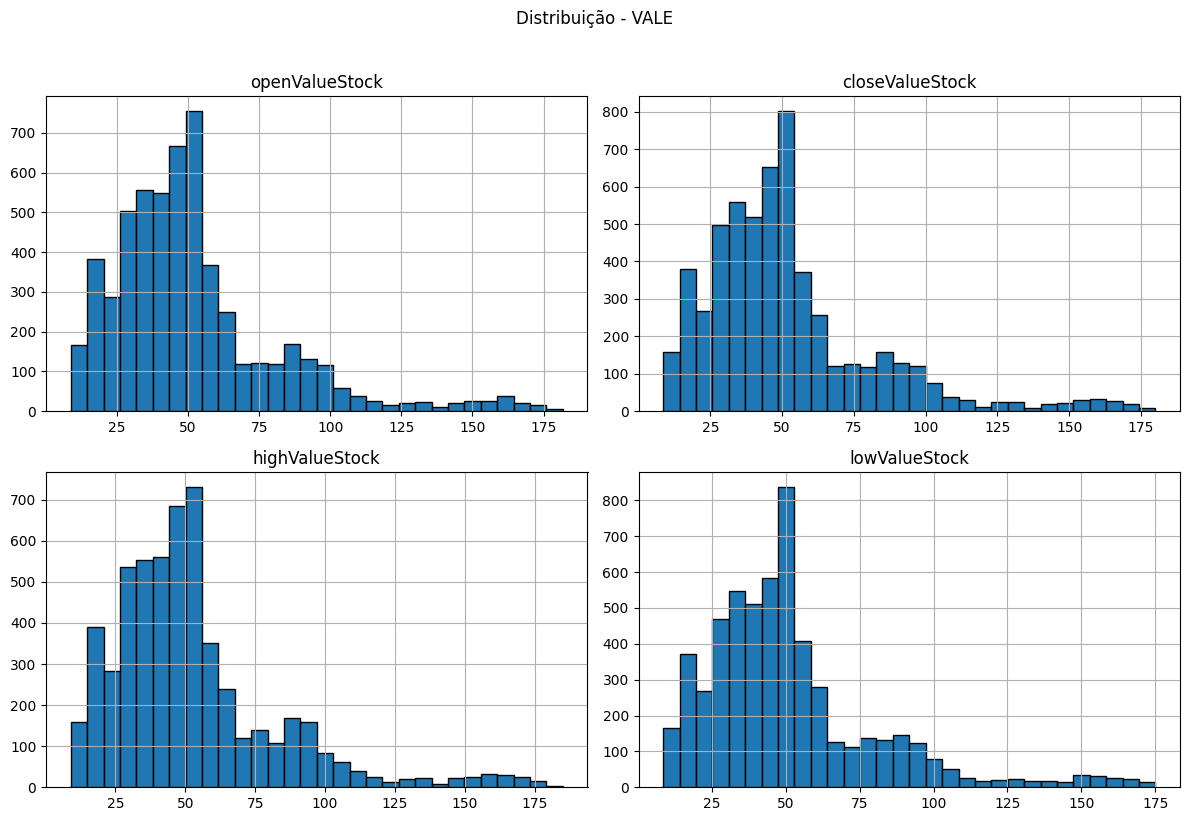

In [40]:
df[df['nameCompany'] == "VALE"][colunas_valores].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribuição - VALE", y=1.02)
plt.tight_layout()
plt.show()

In [41]:
qualitativas = df.select_dtypes(exclude='number')[['sectorCompany']]
tabela_freq = qualitativas['sectorCompany'].value_counts().to_frame('Frequência Absoluta')
tabela_freq['Frequência Relativa (%)'] = (tabela_freq['Frequência Absoluta'] / len(qualitativas)) * 100
tabela_freq.round(2)

,Frequência Absoluta,Frequência Relativa (%)
sectorCompany,,
BM&FBOVESPA CONSUMER STOCK INDEX (ICON),154200,22.67
BM&FBOVESPA DIVIDEND INDEX (IDIV),127429,18.74
UNSPONSORED BDR INDEX-GLOBAL (BDRX),81006,11.91
SPECIAL CORPORATE GOVERNANCE STOCK INDEX (IGC),62981,9.26
BM&FBOVESPA BASIC MATERIALS INDEX (IMAT),61096,8.98
SMALLCAP INDEX (SMLL),34792,5.12
BM&FBOVESPA INDUSTRIALS INDEX (INDX),29493,4.34
NOVO MERCADO CORPORATE GOVERNANCE EQUITY INDEX (IGC-NM),29326,4.31
SPECIAL TAG-ALONG STOCK INDEX (ITAG),21418,3.15


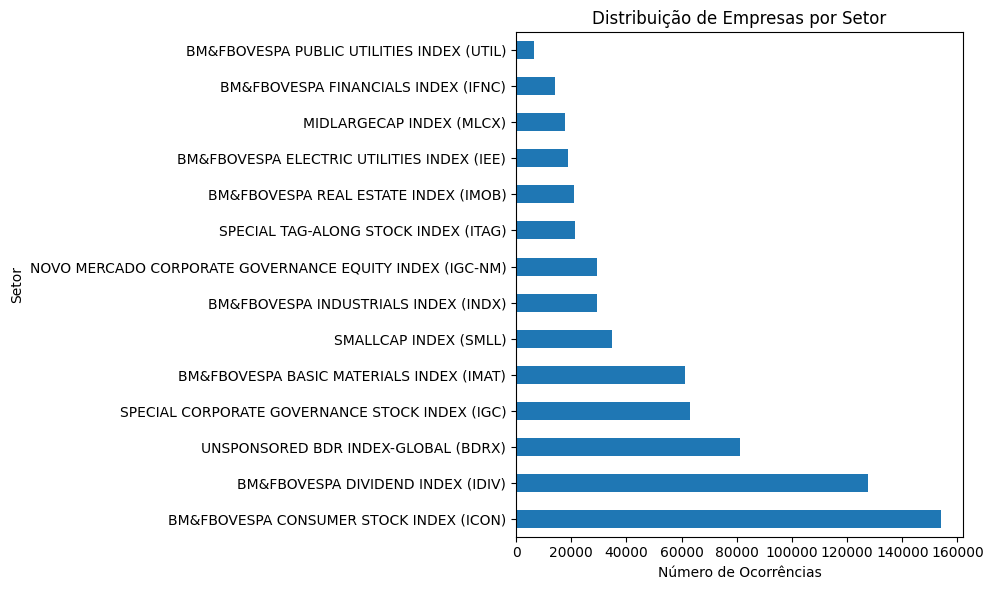

In [42]:
qualitativas['sectorCompany'].value_counts().plot(kind='barh', figsize=(10,6), title="Distribuição de Empresas por Setor")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Setor")
plt.tight_layout()
plt.show()

In [43]:
faltantes = df.isnull().sum()
percentuais = (faltantes / len(df)) * 100
diagnostico = pd.DataFrame({'Faltantes': faltantes, 'Percentual (%)': percentuais})
diagnostico[diagnostico['Faltantes'] > 0].round(2)

,Faltantes,Percentual (%)


In [44]:
print(f"Total de linhas duplicadas: {df.duplicated().sum()}")

Total de linhas duplicadas: 0


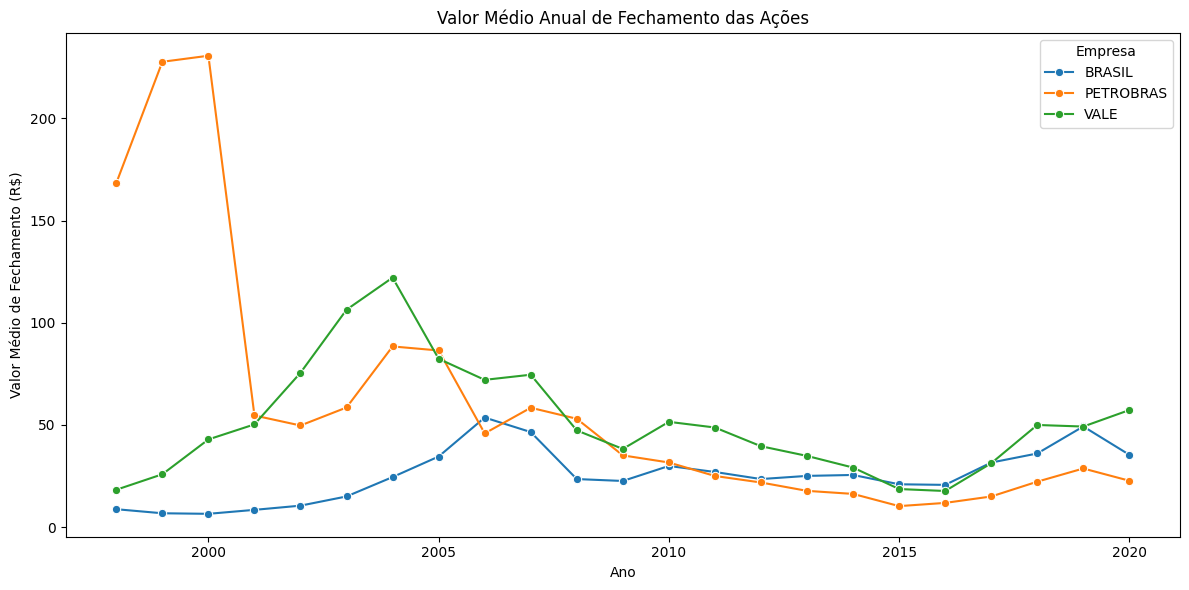

In [46]:
# Filtrar apenas as empresas desejadas
df_emp = df[df['nameCompany'].isin(["PETROBRAS", "BRASIL", "VALE"])].copy()

# Extrair apenas o ano da data
df_emp['ano'] = df_emp['datetime'].dt.year

# Calcular o valor médio anual de fechamento por empresa
media_anual = df_emp.groupby(["ano", "nameCompany"])["closeValueStock"].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_anual, x="ano", y="closeValueStock", hue="nameCompany", marker="o")
plt.title("Valor Médio Anual de Fechamento das Ações")
plt.xlabel("Ano")
plt.ylabel("Valor Médio de Fechamento (R$)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title="Empresa")
plt.show()